# Estimating phase-amplitude coupling
This tutorial goes over the phase-amplitude coupling module (`pac.py`) of `neurodsp`. We apply the different methods to quantify this coupling in some example data which contains sharp beta (~20Hz) oscillations (see the time series plot below). These sharp oscillations manifest in a sine wave decomposition as coupling between the phase of the beta oscillations and the amplitude of high frequency oscillations (e.g. 50-200Hz). You can see this correlation by plotting the relevant phase and amplitude time series using the `timefrequency.py` module.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
import numpy as np
import neurodsp
from matplotlib import cm

### Simulate a neural signal with PAC

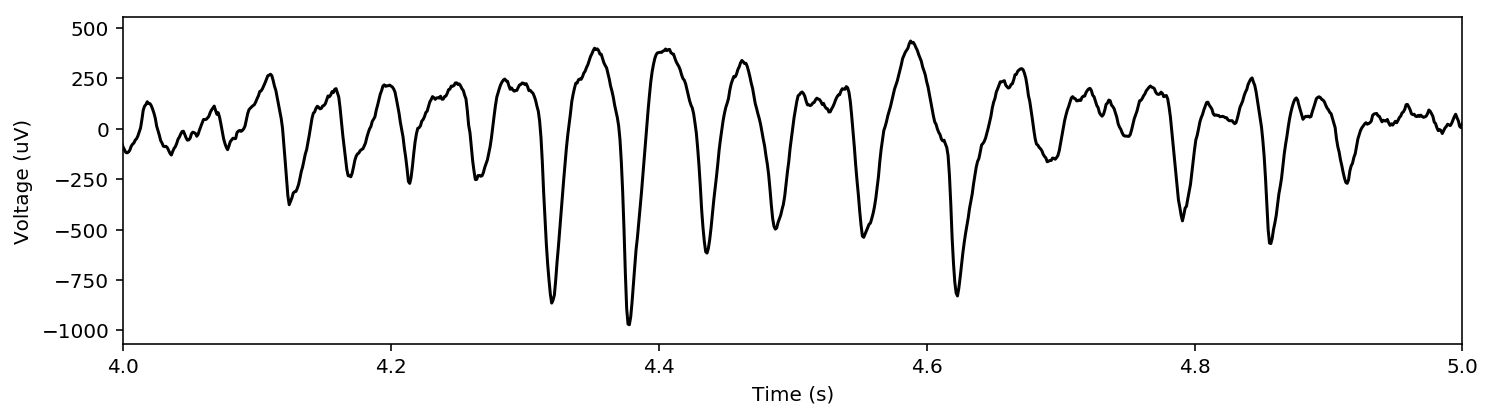

In [3]:
# Load signal
x = np.load('./data/sample_data_1.npy')
Fs = 1000
t = np.arange(0, len(x)/Fs, 1/Fs)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Compute PAC using each method

In [4]:
all_pac_methods = ['ozkurt', 'plv', 'glm', 'tort', 'canolty']
f_range_lo = (13, 30)
f_range_hi = (50, 200)
N_seconds_lo = .25
N_seconds_hi = .2

np.random.seed(0) # The tort and canolty methods uses random methods
pacs = np.zeros(len(all_pac_methods))
for i, m in enumerate(all_pac_methods):
    pacs[i] = neurodsp.compute_pac(x, x, Fs, f_range_lo, f_range_hi,
                               N_seconds_lo=N_seconds_lo, N_seconds_hi=N_seconds_hi,
                               pac_method=m)
    print('PAC strength = {:.4f}, {:s} method'.format(pacs[i], m))

PAC strength = 0.1036, ozkurt method
PAC strength = 0.3116, plv method
PAC strength = 0.0554, glm method
PAC strength = 0.0070, tort method
PAC strength = 7.5079, canolty method


### Compare to PAC in white noise
Note that the PAC strength is lower in a white noise signal compared to the neural signal analyzed above

In [5]:
x_wn = np.random.randn(10000)
for m in all_pac_methods:
    pac = neurodsp.compute_pac(x_wn, x_wn, Fs, f_range_lo, f_range_hi,
                      N_seconds_lo=N_seconds_lo, N_seconds_hi=N_seconds_hi,
                      pac_method=m)
    print('PAC strength = {:.4f}, {:s} method'.format(pac, m))

PAC strength = 0.0039, ozkurt method
PAC strength = 0.0562, plv method
PAC strength = 0.0003, glm method
PAC strength = 0.0001, tort method
PAC strength = -1.4014, canolty method


# Compute PAC comodulogram
Note the user warning about bandwidth of the frequency bins.

In [6]:
# Parameters for comodulogram function
f_pha_bin_edges = np.arange(2, 42, 2)
f_amp_bin_edges = np.arange(20, 200, 4)
N_cycles_pha = 5
N_cycles_amp = 11

# Compute comodulogram
pac = neurodsp.compute_pac_comodulogram(x, x, Fs,
                                        f_pha_bin_edges, f_amp_bin_edges,
                                        N_cycles_pha=N_cycles_pha,
                                        N_cycles_amp=N_cycles_amp,
                                        pac_method='ozkurt')

/gh/bv/neurodsp/neurodsp/pac.py:297: UserWarning: The true bandwidth of the filters used for each frequency bin of the comodulogram is almost always are wider than the declared width of the frequency bin. And this width increases as a function of frequency.For example the frequency bin 60-64Hz likely uses a bandwidth >4Hz. You can decrease this bandwidth by increasing the N_cycles_pha and N_cycles_amp arguments. This warning can be turned off by setting the 'verbose' kwarg to False.
  warnings.warn("The true bandwidth of the filters used for each frequency bin of the comodulogram "


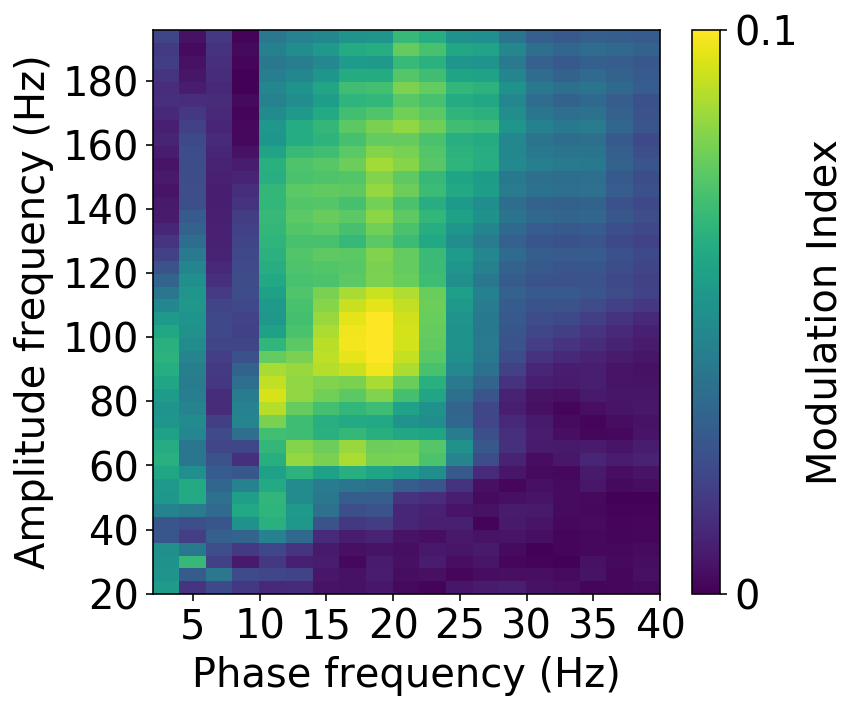

In [7]:
# Plot comodulogram
neurodsp.plot_pac_comodulogram(pac, f_pha_bin_edges, f_amp_bin_edges,
                               clim=(0,.1))